In [2]:
using JLD, PyPlot, HDF5

In [3]:
nombre="/home/karel/BRWFiles/estriado/Cacho_5_estriado_slice1_1004AP.h5"

"/home/karel/BRWFiles/estriado/Cacho_5_estriado_slice1_1004AP.h5"

In [7]:
arx=h5open(nombre)

HDF5 data file: /home/karel/BRWFiles/estriado/Cacho_5_estriado_slice1_1004AP.h5

In [8]:
names(arx)

7-element Array{String,1}:
 "CSDALindenberg"
 "CanalesBuenos" 
 "CanalesMalos"  
 "LFPSaturados"  
 "desde"         
 "freq"          
 "hasta"         

In [9]:
lfp=read(arx["LFPSaturados"])
saturados=read(arx["CanalesMalos"])
buenos=read(arx["CanalesBuenos"])
csda=read(arx["CSDALindenberg"])
freq=read(arx["freq"])
tmax=size(lfp)[3]


1000:1500

In [10]:
length(saturados)

316

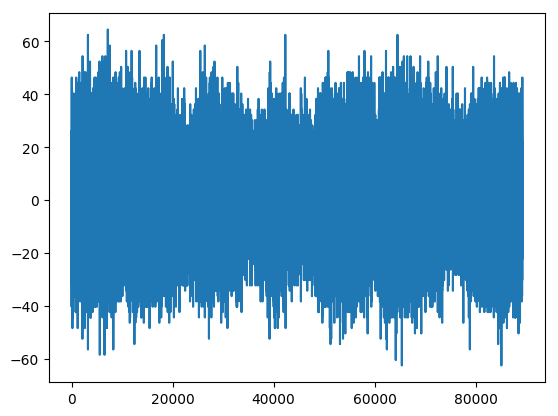

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fa450731cc0>

In [11]:
plotch=lfp[5,43,:];
plot(plotch)

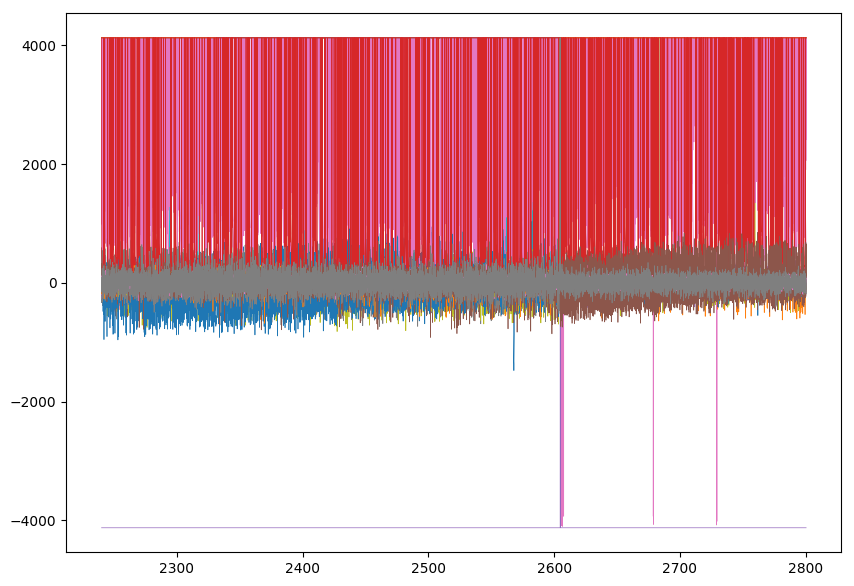

In [21]:
nsatu=size(saturados)[1]
figure(figsize=(10,7))
rang=40000:50000
rangt=rang./freq
for x in 1:nsatu
    j=saturados[x,1]
    k=saturados[x,2]
    plotch=lfp[j,k,rang]
   # print("¡ $j, $k, !")
    plot(rangt, plotch, label="($j, $k)", lw=0.5)
end
#legend()
#savefig("SaturadosPorDesviacion.png",dpi=92)

In [30]:
buenos

25×2 Array{Int64,2}:
 13  42
 42  19
 19   2
  7  40
 39   5
 20  19
 46  35
 51  14
 23  45
 29  21
 49  17
 14  10
 28  21
 47  44
 13  11
 24  21
 22  24
 17  22
 11  57
 63  38
 10  35
 50  31
  1  55
  9  42
 64  35

In [47]:
selectos=[42 19; 23 45; 29 21; 47 44; 24 21; 22 24; 10 35]

7×2 Array{Int64,2}:
 42  19
 23  45
 29  21
 47  44
 24  21
 22  24
 10  35

In [38]:
etiq=("A","B","C","D","E","F","G","H","I");
length(etiq)

9

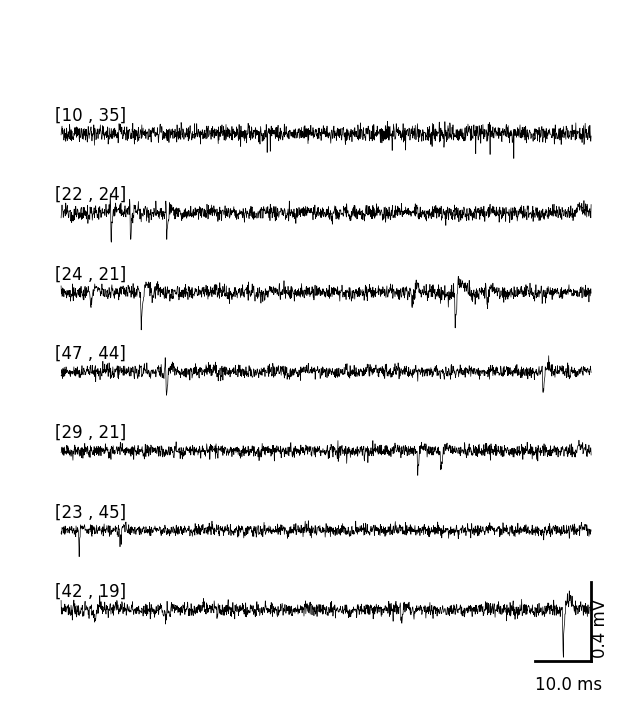

In [67]:
desplazo=400
rango=2000:3700
nbuenos=size(selectos)[1]

figura=figure(figsize=(7,8.5))
axis("off")

xmin=-20
xmax=rango[end]-rango[1]+20
xlim(xmin,xmax)

ymin=-300
ymax=nbuenos*desplazo+200
ylim(ymin,ymax)

for n in 1:nbuenos
    j=selectos[n,1]
    k=selectos[n,2]
    plotch=lfp[j,k,rango].+desplazo*(n-1)
    plot(plotch, c="black",lw=0.5)
    etiqueta="[$j , $k]"
    ajx=70
    annotate(etiqueta, xy=(-20,desplazo*(n-1)+ajx),annotation_clip=false, fontsize=12)
end


interaux=freq*10

ajx=20

plot([xmax-ajx-interaux,xmax-ajx],[-260,-260], lw=2, c="k")
intervalo=round(interaux/freq, digits=0)
annotate("$intervalo ms",xy=(xmax-200,-400), annotation_clip=false,fontsize=12)

plot([xmax-ajx,xmax-ajx],[-260,140],lw=2,c="k")
annotate("0.4 mV",xy=(xmax-ajx,-10), annotation_clip=false,fontsize=12, rotation=90)

savefig("TrazosEjemplares_Estriado_1004AP.svg",dpi=90)

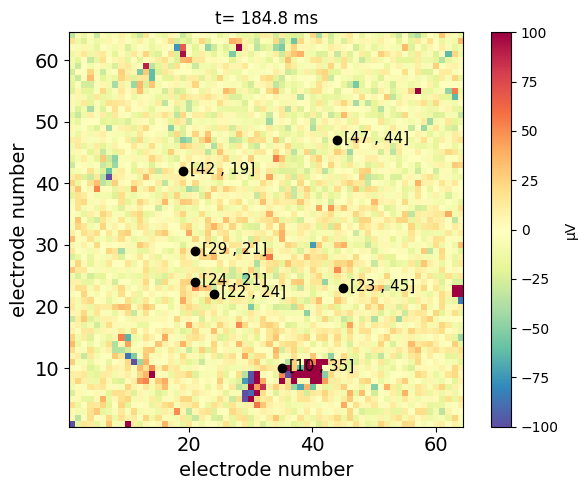

In [74]:
ion()

cuadro=3300
exemplo=lfp[:,:,cuadro];
figure(figsize=(6.5,5.0))
font1 = Dict("family"=>"DejaVu Serif",
    "color"=>"black",
    "weight"=>"normal",
    "size"=>16)
milisec=round(cuadro/freq,digits=1)

title("t= $milisec ms")
limites=100
xlim(0.5,64.5)
ylim(0.5,64.5)

for i in 1:nbuenos
    y=selectos[i,1]
    x=selectos[i,2]
    etiqueta="[$y , $x]"
    ajx=70

    
   annotate(etiqueta, (x,y), xytext=(5,-2), textcoords="offset points", fontsize=11)
   # annotate(primal[punto], (primax[punto], primay[punto]), xytext=(-18,-4), textcoords="offset points", fontsize=14)
   # annotate(dobleprimal[punto], (dobleprimax[punto], dobleprimay[punto]), xytext=(-18,-4), 
   # textcoords="offset points", fontsize=14)
end

imagen=imshow(exemplo, 
interpolation="nearest", cmap="Spectral_r", origin="lower", 
    vmin=-limites, vmax=limites, extent=[0.5,64.5,0.5,64.5])
tick_params(axis="both", labelsize=14)

scatter(selectos[:,2],selectos[:,1], marker="o",c="black")

cbx=colorbar(imagen, fraction=0.045) 
cbx.set_label("µV")
tick_params(axis="both", labelsize=14)

xlabel("electrode number", fontsize=14)
ylabel("electrode number", fontsize=14)

tight_layout()
savefig("MapaBuenosEstriado_10004AP.svg",dpi=90)

In [84]:
x=[]
y=[]
for j in selectos
  append!(x,j[2])
end

In [85]:
x

9-element Array{Any,1}:
 41
 53
 57
 61
 49
 53
 45
 37
 37